In [5]:
# Import necessary libraries
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001



# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    label_mapping = {'fractured': 1, 'non_fractured': 0}  # Mapping class names to numerical labels
    for label in os.listdir(directory):
        if label in label_mapping:
            label_id = label_mapping[label]  # Get the numerical label for the class
            label_path = os.path.join(directory, label)
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image = cv2.imread(image_path)
                image = cv2.resize(image, IMAGE_SIZE)
                image = image.astype('float32') / 255.0  # Normalize
                images.append(image)
                labels.append(label_id)  # Use numerical label
    return np.array(images), np.array(labels)



# Load and preprocess data
data_directory = r'C:\Users\harsh\Desktop\Projects\ML\Bone Fracture Dataset\Dataset\archive (6)\train'  # Directory containing the images
images, labels = load_images(data_directory)

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42)

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/20
112/112 [==============================] - 109s 955ms/step - loss: 0.0064 - accuracy: 0.9939 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
112/112 [==============================] - 105s 935ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
112/112 [==============================] - 128s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
112/112 [==============================] - 108s 969ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
112/112 [==============================] - 106s 946ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
112/112 [==============================] - 105s 943ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
112/112 [==============================] - 123s 1s/step - loss: 0.0000e+

Epoch 1/20
112/112 [==============================] - 104s 930ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
112/112 [==============================] - 105s 939ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
112/112 [==============================] - 97s 870ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
112/112 [==============================] - 98s 878ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
112/112 [==============================] - 96s 854ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
112/112 [==============================] - 90s 805ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
112/112 [==============================] - 100s 897ms/step - loss: 0.

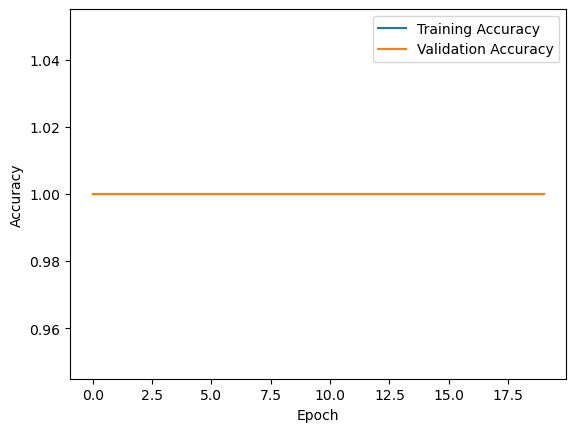

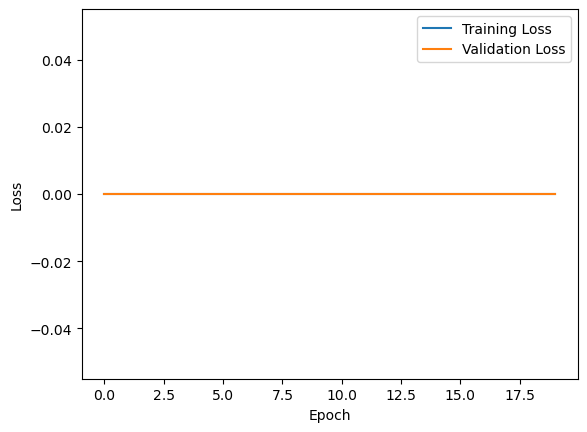

In [3]:
# Train the model and capture the training history
history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


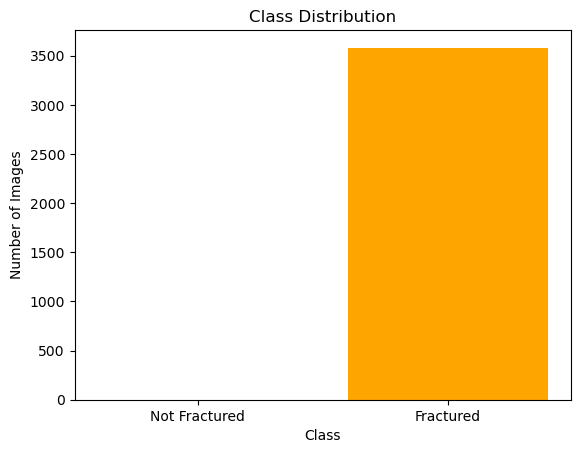

In [6]:
import matplotlib.pyplot as plt

class_labels = ['Not Fractured', 'Fractured']
class_counts = [np.sum(train_labels == 0), np.sum(train_labels == 1)]

plt.bar(class_labels, class_counts, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()


In [7]:
from tensorflow.keras.models import save_model

model.save('my_model.h5')


C:\Users\harsh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 267ms/step
Predicted Class: Not Fractured
Confidence: 1.0


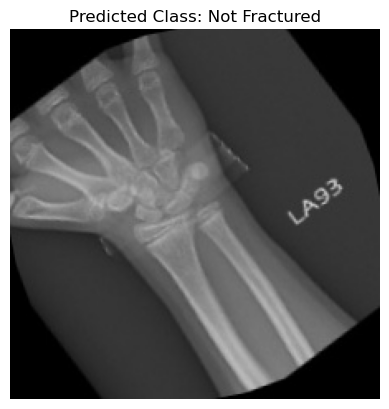

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('my_model.h5')  # Replace 'your_model.h5' with the path to your trained model file

# Load and preprocess the single image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize the image to match the input size of the model
    image = image.astype('float32') / 255.0  # Normalize the pixel values
    return image

# Define the class labels
class_labels = ['Not Fractured', 'Fractured']

# Make predictions on the single image
def predict_image(image_path):
    # Preprocess the image
    image = preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make predictions
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]

    return class_labels[predicted_class], confidence

# Path to the single image you want to analyze
image_path = r'C:\Users\harsh\Desktop\Projects\ML\Bone Fracture Dataset\Dataset\archive (6)\train\not fractured\4-rotated2-rotated3-rotated1.jpg'  # Replace 'your_image.jpg' with the path to your image file

# Get insights on the single image
predicted_class, confidence = predict_image(image_path)

# Display insights
print('Predicted Class:', predicted_class)
print('Confidence:', confidence)

# Display the image with predicted class label
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying with Matplotlib

plt.imshow(image)
plt.title('Predicted Class: ' + predicted_class)
plt.axis('off')
plt.show()
